<a href="https://colab.research.google.com/github/rifki2997/purwadhika_project/blob/main/Hotel_Booking_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science Analytics: Hotel Booking Demand
### Created By : Muhammad Rifki Hartanto

## Business Problem Understanding

**Context**  
A company operating in the field of data science wants to conduct research on hotel booking demand data since there is a demand from hotel owners. They want to understand why people choose to cancel their hotel bookings. The goal is to prevent sudden cancellations that result in financial losses for hotel owners.

**Problem Statement :**

since there are so many feature that hotel offer, the hotel owner need to be specify which feature that make tourist cancell their booking. they also want to know why so many cancellation based on the hotel data that given to our company and how to prevent it.

**Goals :**

based on the problem, our company have a goal to predict booking cancellation
and variable that make a tourist to cancell their booking.

**Analytic Approach :**

so what we do is to analyze a pattern using clasification model and want to know a feature that make people cancel their booking. because of only classification model, we just apply simple EDA for analyze origin the data. after finish analyze the origin data, we interpret based on what we know to build classification model.


**Dataset Hotel Booking Demand**

      - Features: 'country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests'
      - Target: 'is_canceled'

- country: Country of origin.
- market_segment: Market segment designation.
- previous_cancellations: Number of previous bookings that were cancelled by  
  the customer prior to the current booking.
- booking_changes: Number of changes/amendments made to the booking from the
  moment the booking was entered on the PMS until the moment of check-in or cancellation.
- deposit_type: Indication on if the customer made a deposit to guarantee the
  booking.
- days_in_waiting_list: Number of days the booking was in the waiting list    before it was confirmed to the customer.
- customer_type: Type of booking.
- reserved_room_type: Code of room type reserved. Code is presented instead of
  designation for anonymity reasons.
- required_car_parking_space: Number of car parking spaces required by the
  customer.
- total_of_special_request: Number of special requests made by the customer (e. g. twin bed or high floor).
- is_canceled: Value indicating if the booking was canceled (1) or not (0).


In [ ]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
!pip install category-encoders
import category_encoders as ce
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.decomposition import PCA
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.8 MB/s eta 0:00:00


## Data

In [ ]:
df = pd.read_csv('/content/sample_data/Copy of data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


## Data Prepparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [ ]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [ ]:
df.isna().sum()/df.shape[0]*100

country                        0.419992
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

In [ ]:
df['country'].fillna(df['country'].mode, inplace=True)

In [ ]:
df = df.dropna(subset=['is_canceled'])

In [ ]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

In [ ]:
df.shape

(83573, 11)

In [ ]:
df.describe(include='all').replace(np.NaN,'')

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573,83573,83573.0,83573.0,83573,83573.0,83573,83573,83573.0,83573.0,83573.0
unique,163,8,,,3,,4,10,,,
top,PRT,Online TA,,,No Deposit,,Transient,A,,,
freq,34097,39460,,,73352,,62732,60041,,,
mean,,,0.086798,0.220897,,2.330561,,,0.062999,0.573211,0.368277
std,,,0.841011,0.648635,,17.673051,,,0.246919,0.795163,0.48234
min,,,0.0,0.0,,0.0,,,0.0,0.0,0.0
25%,,,0.0,0.0,,0.0,,,0.0,0.0,0.0
50%,,,0.0,0.0,,0.0,,,0.0,0.0,0.0
75%,,,0.0,0.0,,0.0,,,0.0,1.0,1.0


In [ ]:
#check imbalance data
df['is_canceled'].value_counts()/len(df)*100

0    63.172316
1    36.827684
Name: is_canceled, dtype: float64

In [ ]:
kategori = df.columns[df.dtypes == object]
numerikal = df.columns[df.dtypes != object]

In [ ]:
#check numerical data description
df[numerikal].describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [ ]:
df_numerikal = df[numerikal]

def cek_outlier(df,col):
    rekap = pd.DataFrame()
    kolom = []
    Q1 = []
    Q3 = []
    IQR = []
    jmlh = []
    index_outlier = []
    angka = 0

    for i in col:
        angka += 1
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1

        batas_bawah = q1 - 1.5*iqr
        batas_atas = q3 + 1.5*iqr

        hasil = df[(df[i] < batas_bawah) | (df[i] > batas_atas)]
        hitung = len(hasil)

        index_outlier.extend(df[(df[i] < batas_bawah) | (df[i] > batas_atas)].index)

        kolom.append(i)
        Q1.append(q1)
        Q3.append(q3)
        IQR.append(iqr)
        jmlh.append(hitung)

        if angka == len(df_numerikal.columns):
            rekap['Kolom'] = kolom
            rekap['Q1'] = Q1
            rekap['Q3'] = Q3
            rekap['IQR'] = IQR
            rekap['Jumlah Outlier'] = jmlh


    return rekap.sort_values('Jumlah Outlier', ascending=False), index_outlier

In [ ]:
#Outlier Check
rekap = cek_outlier(df, df_numerikal.columns)[0]
rekap['Proporsi'] = rekap['Jumlah Outlier']/len(df)*100
rekap

,Kolom,Q1,Q3,IQR,Jumlah Outlier,Proporsi
1,booking_changes,0.0,0.0,0.0,12700,15.196295
3,required_car_parking_spaces,0.0,0.0,0.0,5227,6.254412
0,previous_cancellations,0.0,0.0,0.0,4513,5.400069
2,days_in_waiting_list,0.0,0.0,0.0,2585,3.093104
4,total_of_special_requests,0.0,1.0,1.0,2051,2.454142
5,is_canceled,0.0,1.0,1.0,0,0.000000


In [ ]:
#test normal testdistribution
from scipy.stats import normaltest
rekap = pd.DataFrame()
kolom = []
hasil = []
angka = 0


for i in df_numerikal.columns:

    angka += 1
    kolom.append(i)

    dp_statistic, dp_pvalue = normaltest(df[i])

    if dp_pvalue > 0.05 :
        a = 'So, we assume a normal distribution'
        hasil.append(a)
    else :
        b = 'So, we assume not a normal distribution'
        hasil.append(b)

    if angka == len(df_numerikal.columns):
        rekap['Kolom'] = kolom
        rekap['hasil'] = hasil

rekap

,Kolom,hasil
0,previous_cancellations,"So, we assume not a normal distribution"
1,booking_changes,"So, we assume not a normal distribution"
2,days_in_waiting_list,"So, we assume not a normal distribution"
3,required_car_parking_spaces,"So, we assume not a normal distribution"
4,total_of_special_requests,"So, we assume not a normal distribution"
5,is_canceled,"So, we assume not a normal distribution"


In [ ]:
#categorical feature
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['country',
 'market_segment',
 'deposit_type',
 'customer_type',
 'reserved_room_type']

In [ ]:
#check unique in categorical column
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in country:  163
Unique values:  ['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR'
 <bound method Series.mode of 0        IRL
 1        FRA
 2        PRT
 3        NLD
 4        PRT
         ...
 83568    PRT
 83569    FRA
 83570    PRT
 83571     CN
 83572    PRT
 Name: country, Length: 83573, dtype: object> 'KOR' 'AZE' 'HUN' 'AUS'
 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV' 'SAU' 'NZL' 'LVA'
 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN' 'VEN' 'IDN' 'GEO'
 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI' 'GRC' 'CYP' 'CPV'
 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM' 'PER' 'QAT' 'SEN'
 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV' 'SYR' 'ZMB' 'LIE'
 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'T

<ipython-input-20-eb0a3e081e70>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)


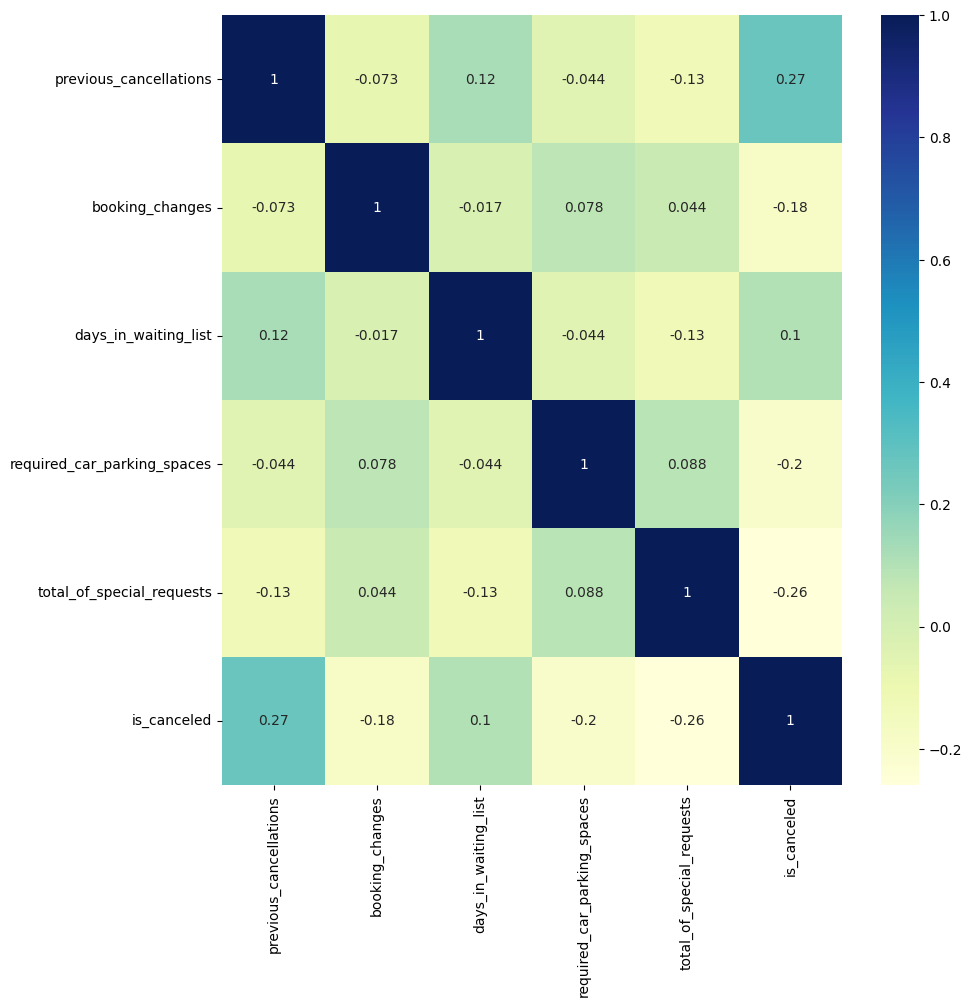

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.show()

Based on Data Preparation, we know that:

1.   There is a missing value in country but we fill it with mode. the numerical column description also stated that there are multiple outlier and all of did not have normal distribution.
2.   Each categorical have different Total unique values and it will be change to in data preprocessing to make it simple for computation. except for reserved room type, based on the description given by hotel, we decided to drop it not only make easier computation, also it doesn't give explanation what kind facility given in each room.
3. Based on heatmap for finding corelation, there is a negative number so we will analyze again.





## **EDA**

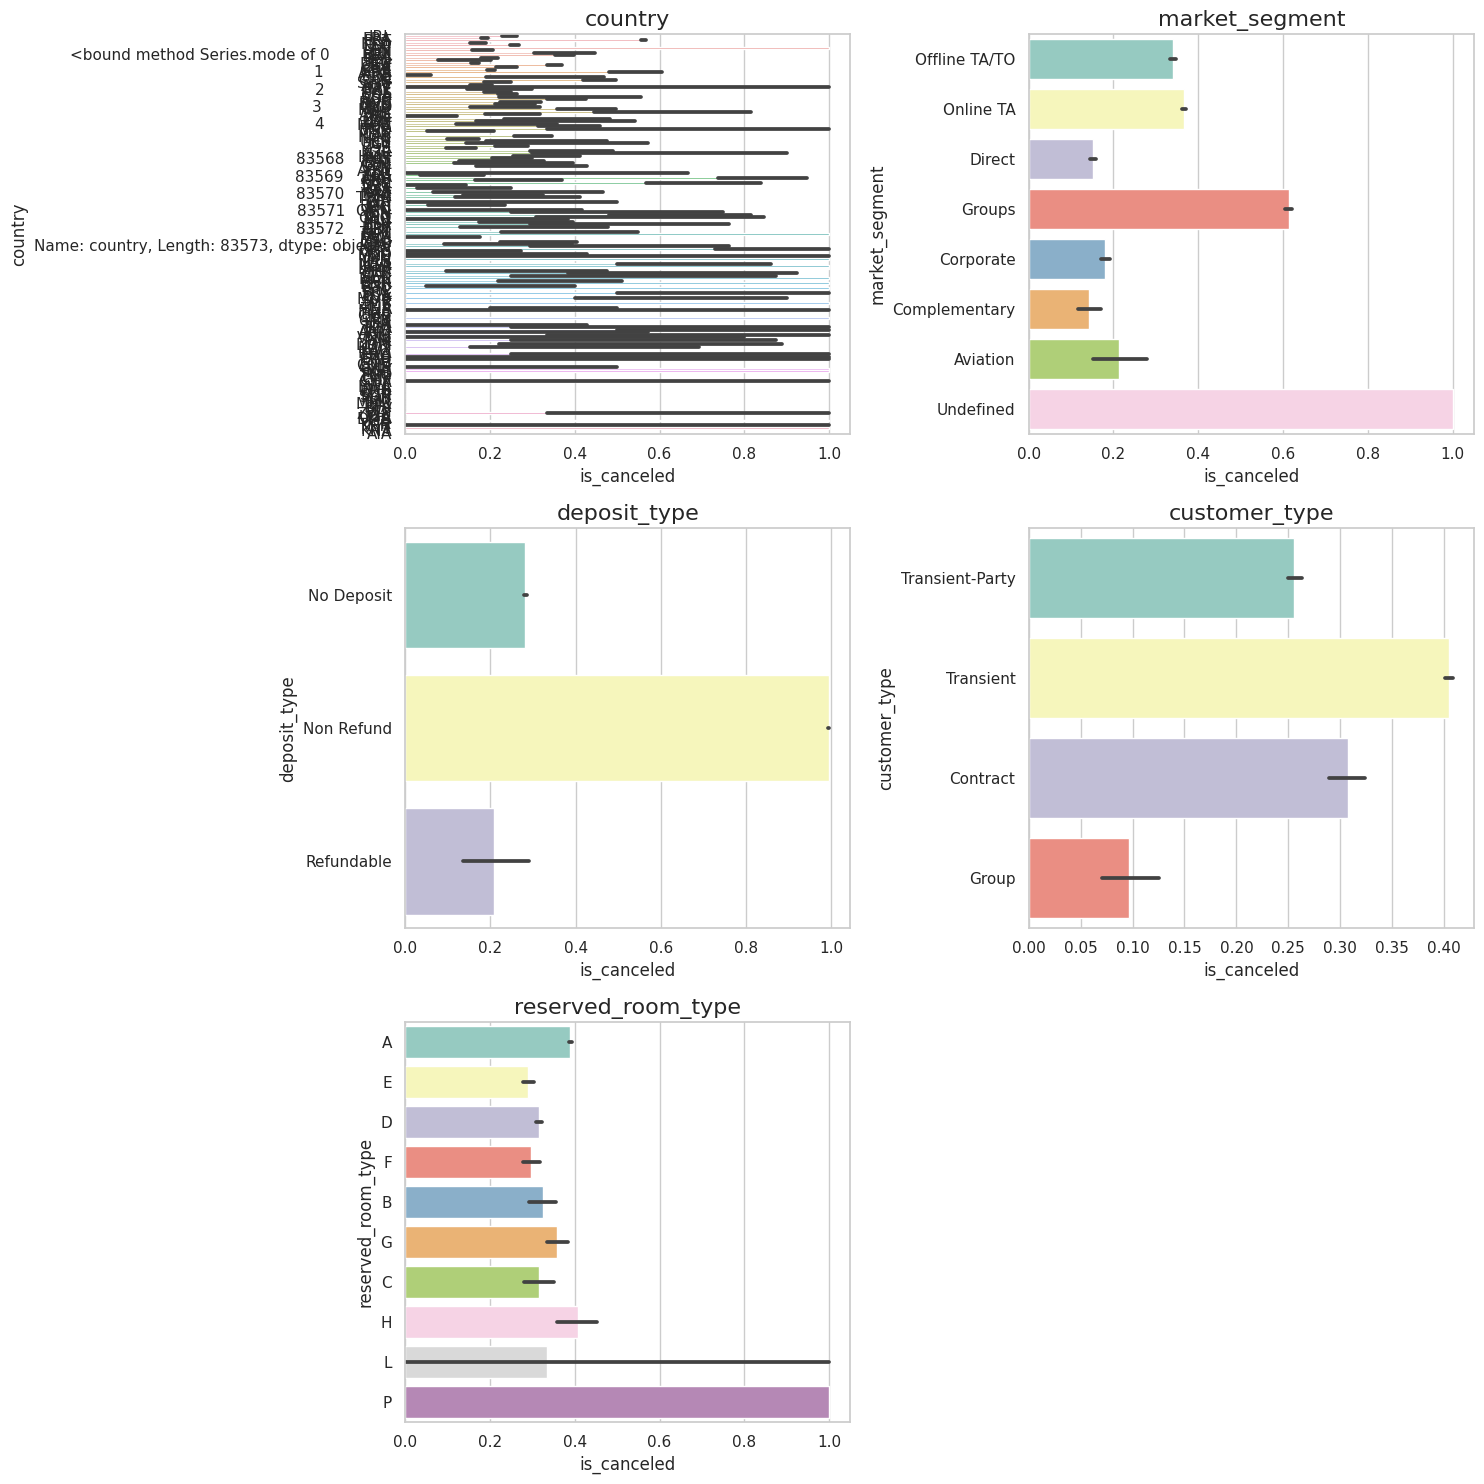

In [ ]:
plt.figure(figsize=(15, 15), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in cat_features:
    # subplot (letak grafik)
    ax = plt.subplot(3, 2, plotnumber)

    # is_canceled berdasarkan feature
    sns.barplot(x = 'is_canceled', y = feature, data = df)

    plt.xlabel('is_canceled')
    plt.ylabel(feature)
    plt.title(feature, fontsize=16)
    plt.tight_layout();

    plotnumber += 1

In [ ]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled']

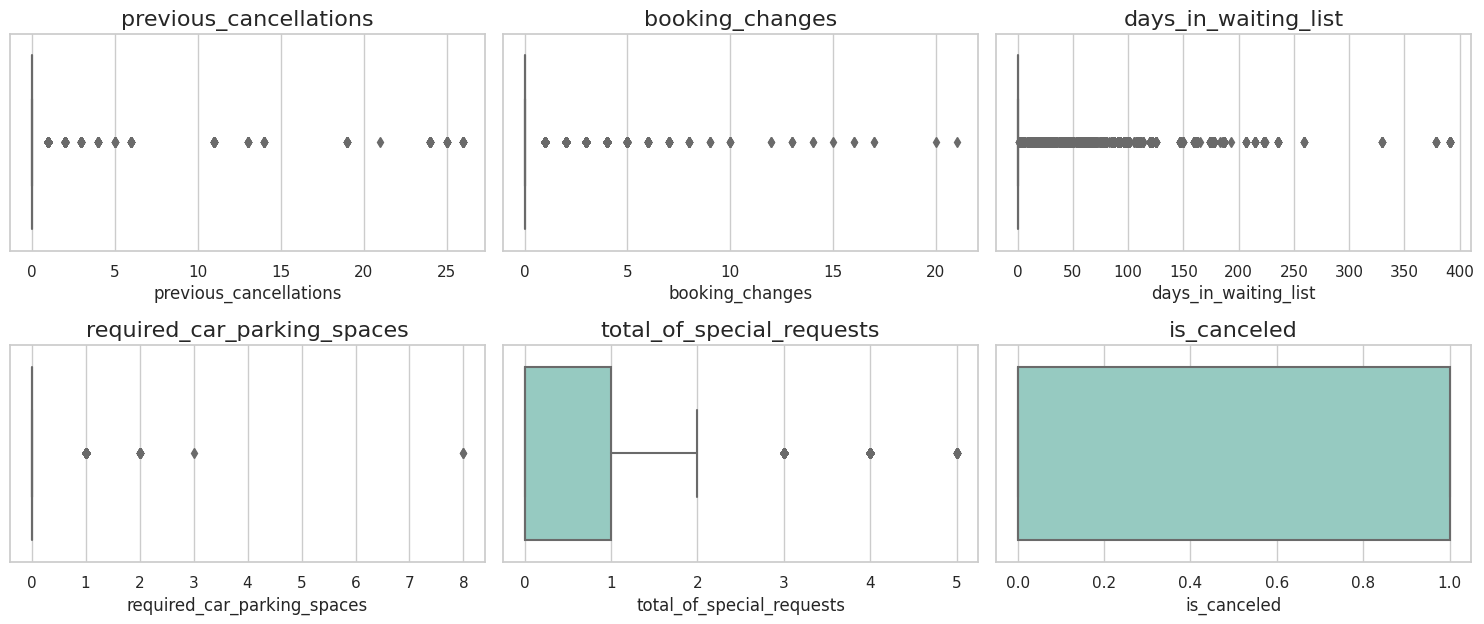

In [ ]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Based on EDA, we know that:

1.   There is a anomaly in numerical category visualisation since in data preparation we find so many outlier.
2.   Each categorical visualisation have different result. first on market segment we discoverd that the people dont have undefined target so thats the reason many employer confuse with the target promotion since people just want vacation. not only people just want vacation, they want trasient booking based on customer type visualisation. based on deposit type, hotel also not refund for booking room also high to prevent cancellation.   
3. In data Preprocessing we decided to change some data into binary data and drop reserved room type based on:
    1. deposit type( can't be refund if they want cancelled no refund/deposit = 1 refund = 0)
    2. customer type( not intend to stay for any permanent length of time trasient = 1 for short long term = 0)
    3. market segment (used for business or just vacation yes = 1 for bisnis, no = 0 for vacation)
    4. reserved room didnt have specification, just code, and make easy computation.
    


## **Data Preprocessing**

In [ ]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [ ]:
df.tail()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
83572,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1


In [ ]:
df.describe(include='object').columns

Index(['country', 'market_segment', 'deposit_type', 'customer_type',
       'reserved_room_type'],
      dtype='object')

In [ ]:
#can't be refund if they want cancelled no refund/deposit = 1 refund =0
mapping1 = {
    'No Deposit': 1,
    'Non Refund': 1,
    'Refundable': 0
}

df['deposit_type'] = df['deposit_type'].map(mapping1)
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,1,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,1,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,1,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,1,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,1,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,1,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,1,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,1,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,1,0,Transient-Party,A,0,0,0


In [ ]:
df['deposit_type'].value_counts()/len(df)*100

1    99.868379
0     0.131621
Name: deposit_type, dtype: float64

In [ ]:
# not intend to stay for any permanent length of time trasient = 1 for short long term = 0
mapping2 = {
    'Transient-Party': 1,
    'Transient': 1,
    'Group': 1,
    'Contract': 0
}

df['customer_type'] = df['customer_type'].map(mapping2)
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,1,0,1,A,0,0,0
1,FRA,Online TA,0,0,1,0,1,A,0,2,0
2,PRT,Online TA,0,1,1,0,1,A,0,2,0
3,NLD,Online TA,0,0,1,0,1,A,0,1,1
4,PRT,Online TA,0,2,1,0,1,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,1,0,0,A,0,3,1
83569,FRA,Online TA,0,0,1,0,1,D,0,2,0
83570,PRT,Online TA,0,1,1,0,1,D,0,3,0
83571,CN,Offline TA/TO,0,0,1,0,1,A,0,0,0


In [ ]:
df['customer_type'].value_counts()/len(df)*100

1    96.551518
0     3.448482
Name: customer_type, dtype: float64

In [ ]:
#used foor business or just vacation yes = 1 for bisnis, no = 0 for vacation
['Offline TA/TO' 'Online TA' 'Direct' 'Groups' 'Corporate' 'Complementary'
 'Aviation' 'Undefined']

mapping3 = {
    'Offline TA/TO': 1,
    'Online TA': 1,
    'Direct': 0,
    'Groups': 0,
    'Corporate': 1,
    'Complementary': 1,
    'Aviation': 1,
    'Undefined': 0
}

df['market_segment'] = df['market_segment'].map(mapping3)
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,1,0,0,1,0,1,A,0,0,0
1,FRA,1,0,0,1,0,1,A,0,2,0
2,PRT,1,0,1,1,0,1,A,0,2,0
3,NLD,1,0,0,1,0,1,A,0,1,1
4,PRT,1,0,2,1,0,1,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,1,0,0,1,0,0,A,0,3,1
83569,FRA,1,0,0,1,0,1,D,0,2,0
83570,PRT,1,0,1,1,0,1,D,0,3,0
83571,CN,1,0,0,1,0,1,A,0,0,0


In [ ]:
df['market_segment'].value_counts()/len(df)*100

1    72.933842
0    27.066158
Name: market_segment, dtype: float64

In [ ]:
df = df.drop(['reserved_room_type'], axis=1)

In [ ]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,1,0,0,1,0,1,0,0,0
1,FRA,1,0,0,1,0,1,0,2,0
2,PRT,1,0,1,1,0,1,0,2,0
3,NLD,1,0,0,1,0,1,0,1,1
4,PRT,1,0,2,1,0,1,0,2,0


since country have bigger data than other data, it might be wise to use binary encoding.

In [ ]:
onehot = OneHotEncoder(drop='first', handle_unknown='ignore')
onehot_var = ['market_segment', 'deposit_type','customer_type']

transformer = ColumnTransformer([
    ('onehot', onehot, onehot_var),('binary', ce.BinaryEncoder(), ['country'])
], remainder='passthrough')
#('binary', ce.BinaryEncoder(), ['country','reserved_room_type'])
# scaler
scaler = StandardScaler()

## **Data Splitting**

In [ ]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=0
)

In [ ]:
transformer.fit_transform(X_train)

array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 66858
Number of samples in y_train: 66858


In [ ]:
transformer.get_feature_names_out()

array(['onehot__market_segment_1', 'onehot__deposit_type_1',
       'onehot__customer_type_1', 'binary__country_0',
       'binary__country_1', 'binary__country_2', 'binary__country_3',
       'binary__country_4', 'binary__country_5', 'binary__country_6',
       'binary__country_7', 'remainder__previous_cancellations',
       'remainder__booking_changes', 'remainder__days_in_waiting_list',
       'remainder__required_car_parking_spaces',
       'remainder__total_of_special_requests'], dtype=object)

In [ ]:
# nama features

features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['market_segment_1',
 'deposit_type_1',
 'customer_type_1',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

## **Benchmark Model**

In [ ]:
logreg = LogisticRegression() # Logistic Regression
knn = KNeighborsClassifier() # KNN
tree = DecisionTreeClassifier(random_state=0) # DecsionTree
rf = RandomForestClassifier(random_state=0) # RandomForest
ada = AdaBoostClassifier(tree, random_state=0) # Adaboost
gbc = GradientBoostingClassifier(random_state=0) # Gradientboost
xgbc = XGBClassifier(random_state=0, verbosity=0) # ExtremeGradientBoost
lgbm = lgb.LGBMClassifier()

In [ ]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc, lgbm]
score = []
nilai_mean = []
nilai_std = []

for i in models:

    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='f1',
        error_score='raise'
        )

    print(model_cv, i)

    score.append(model_cv)
    nilai_mean.append(model_cv.mean())
    nilai_std.append(model_cv.std())

[0.61930699 0.61655848 0.61762035 0.61815283 0.61960962] LogisticRegression()
[0.33392198 0.67285605 0.66717412 0.66074329 0.66387435] KNeighborsClassifier()
[0.65549923 0.64714397 0.6515587  0.65253863 0.65257596] DecisionTreeClassifier(random_state=0)
[0.65639106 0.6490818  0.65192882 0.6524525  0.65500165] RandomForestClassifier(random_state=0)
[0.65542328 0.64974507 0.65141973 0.65339784 0.652868  ] AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)
[0.6240037  0.62682216 0.63147299 0.64417444 0.64348582] GradientBoostingClassifier(random_state=0)
[0.65554685 0.64826199 0.64867276 0.65210745 0.64993866] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance

In [ ]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 66858
Number of samples in y_train: 66858


In [ ]:
pd.DataFrame({
    'model':models,
    'mean':nilai_mean,
    'std':nilai_std
})

,model,mean,std
0,LogisticRegression(),0.618250,0.001117
1,KNeighborsClassifier(),0.599714,0.132956
2,DecisionTreeClassifier(random_state=0),0.651863,0.002704
3,RandomForestClassifier(random_state=0),0.652971,0.002542
4,AdaBoostClassifier(estimator=DecisionTreeClass...,0.652571,0.001909
5,GradientBoostingClassifier(random_state=0),0.633992,0.008383
6,"XGBClassifier(base_score=None, booster=None, c...",0.650906,0.002679
7,LGBMClassifier(),0.649892,0.002700


### Model Benchmarking : Test Data

In [ ]:
models = [logreg,knn,tree,rf,xgbc,gbc, ada, lgbm]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test

    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','GradientBoostingClassifier',
                        'AdaBoostClassifier', 'LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','GradientBoostingClassifier','AdaBoostClassifier', 'LightGBM'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 
               precision    recall  f1-score   support

           0       0.76      0.86      0.81     10559
           1       0.70      0.53      0.60      6156

    accuracy                           0.74     16715
   macro avg       0.73      0.70      0.71     16715
weighted avg       0.74      0.74      0.73     16715

KNN 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78     10559
           1       0.62      0.69      0.66      6156

    accuracy                           0.73     16715
   macro avg       0.72      0.72      0.72     16715
weighted avg       0.74      0.73      0.73     16715

Decision Tree 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82     10559
           1       0.71      0.59      0.64      6156

    accuracy                           0.76     16715
   macro avg       0.75      0.72      0.73     16715
weighted avg       0.76      0

,roc_auc score
model,
LightGBM,0.821283
XGBoost,0.821090
Random Forest,0.819870
AdaBoostClassifier,0.818580
Decision Tree,0.818146
GradientBoostingClassifier,0.809658
KNN,0.793191
Logistic Regression,0.772325


In [ ]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 66858
Number of samples in y_train: 66858


### Test Oversampling with K-Fold Cross Validation

In [ ]:
def calc_train_error(X_train1, y_train1, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train1)
    predictProba = model.predict_proba(X_train1)
    accuracy = accuracy_score(y_train1, predictions)
    f1 = f1_score(y_train1, predictions, average='macro')
    roc_auc = roc_auc_score(y_train1, predictProba[:,1])
    recall = recall_score(y_train1, predictions)
    precision = precision_score(y_train1, predictions)
    report = classification_report(y_train1, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train1, y_train1, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train1, y_train1)
    train_error = calc_train_error(X_train1, y_train1, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [ ]:
X_train1 = X_train
y_train1 = y_train
data = X_train1
target = y_train1

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train1, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train1, Y_val = target.iloc[train_index], target.iloc[val_index]

    #print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train1, Y_train1)

    # instantiate model
    #lgbm = lgb.LGBMClassifier()
    xgbc = XGBClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',xgbc)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train1, Y_train1, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

In [ ]:
print("Number of samples in X_train1:", len(X_train1))
print("Number of samples in y_train1:", len(y_train1))
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train1: 60173
Number of samples in y_train1: 66858
Number of samples in X_train: 66858
Number of samples in y_train: 66858


#### Evaluation Metrics Without Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.767982,0.763536,0.833076,0.820529,0.739761,0.732388,0.595578,0.573517,0.725284,0.726711
1,0.768148,0.763984,0.832481,0.826778,0.739640,0.735735,0.593637,0.593420,0.726755,0.716879
2,0.767649,0.762489,0.832459,0.822403,0.738600,0.732880,0.589621,0.583266,0.727789,0.718719
3,0.767733,0.763984,0.831770,0.828742,0.738710,0.735035,0.589847,0.588546,0.727865,0.719464
4,0.768015,0.764583,0.833003,0.825805,0.739018,0.736232,0.590162,0.593014,0.728376,0.718504
5,0.768015,0.763087,0.831869,0.822445,0.738953,0.733433,0.589711,0.583266,0.728631,0.720160
6,0.768248,0.765480,0.832442,0.826693,0.740136,0.735709,0.596507,0.583435,0.725387,0.726124
7,0.768414,0.766826,0.832345,0.833526,0.740366,0.739457,0.597049,0.600893,0.725488,0.719844
8,0.766623,0.774121,0.830222,0.837625,0.738048,0.747104,0.592419,0.607230,0.723744,0.733562
9,0.768418,0.766043,0.832810,0.824894,0.740171,0.735824,0.595623,0.580829,0.726297,0.728848


#### Evaluation Metrics With Oversampling

In [ ]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train ROC AUC',
                            'Test ROC AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.745501,0.730482,0.834161,0.820654,0.745411,0.720194,0.764390,0.731519,0.736565,0.612169
1,0.745672,0.736763,0.832584,0.827254,0.745672,0.726878,0.746738,0.742080,0.745150,0.618902
2,0.742318,0.749327,0.832671,0.822141,0.741887,0.734220,0.701463,0.693745,0.763880,0.649430
3,0.746948,0.738259,0.834432,0.828243,0.746910,0.729183,0.759260,0.753859,0.741014,0.618667
4,0.745922,0.734520,0.834441,0.825912,0.745876,0.726000,0.759497,0.757920,0.739422,0.612808
5,0.745778,0.734520,0.834939,0.822524,0.745735,0.725515,0.758734,0.751422,0.739570,0.614006
6,0.745561,0.744990,0.832750,0.827212,0.745536,0.733208,0.735775,0.725944,0.750463,0.634493
7,0.744785,0.745438,0.832541,0.832918,0.744784,0.735468,0.742641,0.748274,0.745839,0.630085
8,0.742733,0.760509,0.831715,0.837706,0.742557,0.747883,0.716571,0.728676,0.756135,0.657866
9,0.744561,0.738220,0.832610,0.824594,0.744546,0.727716,0.752269,0.735581,0.740848,0.622337


#### Classification Reports Without Oversampling

In [ ]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4224
           1       0.73      0.57      0.64      2462

    accuracy                           0.76      6686
   macro avg       0.75      0.72      0.73      6686
weighted avg       0.76      0.76      0.76      6686

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4224
           1       0.72      0.59      0.65      2462

    accuracy                           0.76      6686
   macro avg       0.75      0.73      0.74      6686
weighted avg       0.76      0.76      0.76      6686

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4224
           1       0.72      0.58      0.64      2462

    accuracy                           0.76      6686
   macro avg       0.75      0.73      0.73      6686
weighted avg       0.76      0.76      0.76      6686

              preci

#### Classification Reports With Oversampling

In [ ]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4224
           1       0.61      0.73      0.67      2462

    accuracy                           0.73      6686
   macro avg       0.72      0.73      0.72      6686
weighted avg       0.75      0.73      0.73      6686

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      4224
           1       0.62      0.74      0.67      2462

    accuracy                           0.74      6686
   macro avg       0.72      0.74      0.73      6686
weighted avg       0.75      0.74      0.74      6686

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4224
           1       0.65      0.69      0.67      2462

    accuracy                           0.75      6686
   macro avg       0.73      0.74      0.73      6686
weighted avg       0.75      0.75      0.75      6686

              preci

since the with oversampling has higher precission to prevent cancellation, we used with oversampling.

In [ ]:
print("Number of samples in X_train:", len(X_train))
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 66858
Number of samples in y_train: 66858


**Hyper parameter Tuning**


In [ ]:
# depth of tree
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# number of tree
n_estimators = list(np.arange(50,500))

# number of train set in each tree (% of total number of train set rows)
subsample = list(np.arange(2,10)/10)

# number of features used for splitting in tree (% of total number of train set columns)
max_features = list(np.arange(1,10)/10)

# Hyperparameter space GBC
hyperparam_space_gbc = {
    'model__max_depth':max_depth ,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [ ]:
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Benchmark model 1
gbc = GradientBoostingClassifier(random_state=0)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('tansformer', transformer),
    ('model', gbc)
    ])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc,
    param_distributions = hyperparam_space_gbc,
    cv = skf,
    scoring = 'f1',
    n_jobs = -1,
    n_iter=20,
    random_state=0
)

In [ ]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])])),
                                             ('model',
                                              Gradient...
                                                                 0.21, 0.22,
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, scoring='f1')

In [ ]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.690405,0.092874,0.137380,0.006015,0.6,375,0.9,5,0.29,"{'model__subsample': 0.6, 'model__n_estimators...",0.661081,0.652049,0.650941,0.652357,0.652534,0.653792,0.003686,1
3,11.321540,0.119568,0.204598,0.074938,0.5,362,0.2,7,0.18,"{'model__subsample': 0.5, 'model__n_estimators...",0.655024,0.648949,0.651168,0.657824,0.653529,0.653299,0.003065,2
13,17.903153,1.112053,0.242427,0.073910,0.8,328,0.2,9,0.17,"{'model__subsample': 0.8, 'model__n_estimators...",0.655684,0.652361,0.651641,0.653173,0.653380,0.653248,0.001366,3
12,21.073018,0.146997,0.215760,0.001535,0.9,472,0.4,7,0.1,"{'model__subsample': 0.9, 'model__n_estimators...",0.656305,0.649449,0.650752,0.655233,0.654193,0.653186,0.002639,4
6,11.095403,0.056190,0.153968,0.001339,0.9,380,0.2,6,0.52,"{'model__subsample': 0.9, 'model__n_estimators...",0.655568,0.651091,0.650044,0.652931,0.652778,0.652482,0.001881,5


In [ ]:
print('GBC')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

GBC
Best_score: 0.65379227511316
Best_params: {'model__subsample': 0.6, 'model__n_estimators': 375, 'model__max_features': 0.9, 'model__max_depth': 5, 'model__learning_rate': 0.29}


In [ ]:
# depth of tree
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# number of tree
n_estimators = list(np.arange(100,201))

# number of rows for each tree (% dari total rows train set)
subsample = list(np.arange(2,10)/10)

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# number of feature used for each tree (% of total column in train set)
colsample_bytree = list(np.arange(1,10)/10)

# alpha (regularization)
reg_alpha = list(np.logspace(-3,1,10))


# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'model__max_depth':max_depth,
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model 2
xgbc = XGBClassifier(random_state=0, verbosity=0)
skf = StratifiedKFold(n_splits = 5)
# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('tansformer', transformer),
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator_xgbc,
    param_distributions = hyperparam_space_xgbc,
    cv = skf,
    scoring = 'f1',
    n_jobs = -1,
    n_iter=20,
    random_state=0
)

In [ ]:
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])])),
                                             ('model',
                                              XGBClass...
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001,
                                                             0.0027825594022071257,
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, scoring='f1')

In [ ]:
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,9.127937,0.111801,0.045796,0.003521,0.5,0.021544,107,10,0.95,8,0.6,"{'model__subsample': 0.5, 'model__reg_alpha': ...",0.658494,0.644816,0.648667,0.652888,0.657320,0.652437,0.005158,1
2,7.468268,0.465580,0.119814,0.036127,0.2,0.464159,146,8,0.61,1,0.6,"{'model__subsample': 0.2, 'model__reg_alpha': ...",0.661203,0.647810,0.649430,0.649603,0.649839,0.651577,0.004866,2
19,8.111957,0.506498,0.045432,0.005424,0.3,0.007743,102,9,0.66,7,0.8,"{'model__subsample': 0.3, 'model__reg_alpha': ...",0.659345,0.645975,0.648257,0.653070,0.651209,0.651571,0.004585,3
12,3.457647,0.377520,0.059834,0.001455,0.2,1.29155,108,7,0.45,1,0.4,"{'model__subsample': 0.2, 'model__reg_alpha': ...",0.657018,0.644223,0.645845,0.646829,0.648257,0.648434,0.004488,4
16,4.496547,0.373373,0.065979,0.020290,0.9,0.001,112,7,0.38,4,0.4,"{'model__subsample': 0.9, 'model__reg_alpha': ...",0.650164,0.643637,0.646419,0.647474,0.649493,0.647437,0.002330,5


In [ ]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.6524369494325855
Best_params: {'model__subsample': 0.5, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 107, 'model__max_depth': 10, 'model__learning_rate': 0.95, 'model__gamma': 8, 'model__colsample_bytree': 0.6}


### Feature Importances

In [ ]:
model_final = Pipeline([
    ('transformer', transformer),
    ('model', GradientBoostingClassifier(random_state=0))
])

model_final.fit(X_train, y_train)

y_pred = model_final.predict(X_test)

In [ ]:
imp = model_final['model'].feature_importances_
imp

array([0.0577483 , 0.00028098, 0.01704583, 0.        , 0.        ,
       0.00700173, 0.00243525, 0.00486058, 0.05214025, 0.18042775,
       0.00854918, 0.23215939, 0.11123577, 0.01350317, 0.11898143,
       0.19363039])

In [ ]:
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Feature':list_features
}).sort_values(by='Importance', ascending = False)

feature_imp

,Importance,Feature
11,0.232159,previous_cancellations
15,0.193630,total_of_special_requests
9,0.180428,country_6
14,0.118981,required_car_parking_spaces
12,0.111236,booking_changes
0,0.057748,market_segment_1
8,0.052140,country_5
2,0.017046,customer_type_1
13,0.013503,days_in_waiting_list
10,0.008549,country_7


<Axes: xlabel='Importance', ylabel='Feature'>

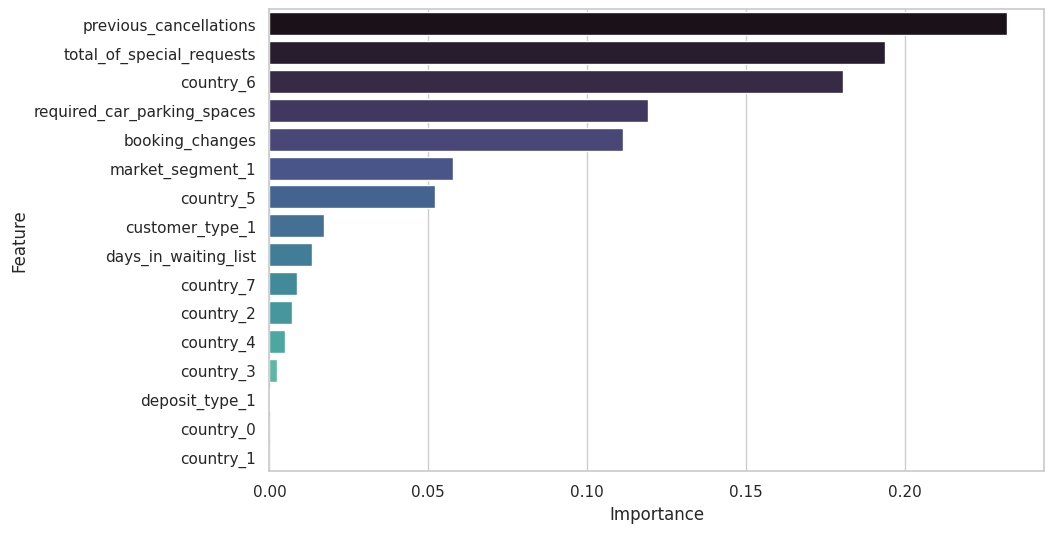

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient='h', palette='mako')

Based on Data Training, we know that:

1.   We use XGBClassifier and GradientBoostingClassifier Method to tuning the perfomance even only litle increase performance rather than using random forest because it is more easier for computation. not only about mean performance increase, we decided use precision since have higher number than recall and prevent more cancellation.
2.   Based on feature component the higher component is from previous cancellation, total of special request, country_6, required parking space, booking changes, and market segment.

**Conclusion & Recomendation**

based on the performance is 0.6524369494325855 (xgbc) and 0.65379227511316(gbc) which is seem low, we know what feature that must be increased such as previous cancellation that happened and the hotel owner cant anticipate, total of special request that cant be fulfil by the hotel, required parking space that full or the size is not comfortable, booking changes, and market segment which is not suitable.